In [1]:
#loading libraries for scrapping twitter data
import pandas as pd

#import snscrape.modules.twitter as sntwitter
import itertools
import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load data
data_df=pd.read_csv('tweets_exercise.csv',index_col=0)

In [4]:
#reset author to a column
data_df = data_df.reset_index()

In [11]:
#let's see what we have
data_df[50:70]

,id,keyword,location,text,target
50,73,ablaze,"Sheffield Township, Ohio",Deputies: Man shot before Brighton home set ab...,1
51,74,ablaze,India,Man wife get six years jail for setting ablaze...,1
52,76,ablaze,Barbados,SANTA CRUZ ÛÓ Head of the St Elizabeth Police...,0
53,77,ablaze,Anaheim,Police: Arsonist Deliberately Set Black Church...,1
54,78,ablaze,Abuja,Noches El-Bestia '@Alexis_Sanchez: happy to se...,0
55,79,ablaze,USA,#Kurds trampling on Turkmen flag later set it ...,1
56,80,ablaze,South Africa,TRUCK ABLAZE : R21. VOORTREKKER AVE. OUTSIDE O...,1
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0
58,82,ablaze,hollywoodland,They sky was ablaze tonight in Los Angeles. I'...,0
59,83,ablaze,"Edmonton, Alberta - Treaty 6",How the West was burned: Thousands of wildfire...,1


In [7]:
#see the structure of the dataframe (rows, columns)
df.shape

(7613, 4)

In [8]:
#displaying the last 7 tweets from the data
df.tail(7)

,keyword,location,text,target
id,,,,
10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
10872,NaN,NaN,Police investigating after an e-bike collided ...,1
10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [10]:
#inspecting a single row of the text column
#look from 1st to 7th column
data_df['text'][0:7]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
Name: text, dtype: object

In [27]:
#selecting columns of interest only
text=data_df[['keyword','location','text','target']]

In [17]:
# inspect the first 10 rows
text[1:10]

,keyword,location,text,target
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,NaN,NaN,There's an emergency evacuation happening now ...,1
9,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


## Data cleaning

In [20]:
#information about the data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [24]:
#identifying missing values
data_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [29]:
# removing duplicates from the text column
text.drop_duplicates('text', keep='first')

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7604,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,NaN,NaN,on the flip side I'm at Walmart and there is a...,1
7606,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...,1


In [31]:
#remove username and links,hashtags and extra spaces

def clean_text(text):
    #remove links
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)
    #remove usernames
    username_pattern = re.compile(r'@\w+')
    text = username_pattern.sub(r'', text)
    # Remove hashtags
    hashtag_pattern = re.compile(r'#\w+')
    text = hashtag_pattern.sub(r'', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [36]:
text['Processed_Text'] =text['text'].apply(clean_text)
text.head()

,keyword,location,text,target,Processed_Tweets,Processed_Text
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this May ALLAH For...,Our Deeds are the Reason of this May ALLAH For...
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive evacuation orders in Cal...","13,000 people receive evacuation orders in Cal..."
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby as smoke fr...,Just got sent this photo from Ruby as smoke fr...


In [37]:
# remove punctuation from the text column
import string
import html
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
text['Processed_Text']=text['Processed_Text'].apply(lambda x: remove_punctuation(x))
text.head()

,keyword,location,text,target,Processed_Tweets,Processed_Text
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this May ALLAH For...,Our Deeds are the Reason of this May ALLAH For...
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive evacuation orders in Cal...",13000 people receive evacuation orders in Cali...
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby as smoke fr...,Just got sent this photo from Ruby as smoke fr...


In [47]:
text=text[['keyword', 'location', 'text', 'target', 'Processed_Text']]

In [42]:
text.shape

(7613, 5)

In [43]:
text.head()

,keyword,location,text,target,Processed_Text
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this May ALLAH For...
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive evacuation orders in Cali...
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby as smoke fr...


In [49]:
# remove numbers 
def remove_numbers(Processed_Text):
    Processed_Text=re.sub(r'\d','',Processed_Text)
    return Processed_Text
text['Processed_Text']=text['Processed_Text'].apply(lambda x: remove_numbers(x))
text.head()

,keyword,location,text,target,Processed_Text
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this May ALLAH For...
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation orders in California
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby as smoke fr...


In [50]:
# cleaning newline '\n', '\r' from the tweets
for i in range (len(text['Processed_Text'])):
    
    x = text['Processed_Text'][i].replace("\n"," ").replace("\r"," ") #cleaning newline “\n” from the tweets
    text['Processed_Text'][i] = html.unescape(x)

In [52]:
#remove emojis
def deEmojify(inputString):
    return inputString.encode('ascii','ignore').decode('ascii')
text['Processed_Text']=text['Processed_Text'].apply(lambda s:deEmojify(s))
text.head()

,keyword,location,text,target,Processed_Text
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this May ALLAH For...
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation orders in California
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby as smoke fr...


In [53]:
text['Processed_Text'][0:10]

0    Our Deeds are the Reason of this May ALLAH For...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to shelter in place are be...
3       people receive evacuation orders in California
4    Just got sent this photo from Ruby as smoke fr...
5    Update  California Hwy  closed in both directi...
6    Heavy rain causes flash flooding of streets in...
7    Im on top of the hill and I can see a fire in ...
8    Theres an emergency evacuation happening now i...
9     Im afraid that the tornado is coming to our area
Name: Processed_Text, dtype: object

In [55]:
#convert cleaned text to lower case
text['Processed_Text']=text['Processed_Text'].str.lower()
text.head(6)

,keyword,location,text,target,Processed_Text
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this may allah for...
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation orders in california
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby as smoke fr...
5,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,update california hwy closed in both directi...


In [56]:
# importing libraries for preprocessing
import nltk
nltk.download('stopwords') #words that do not add meaning to machines
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# from nltk.stem.porter import PorterStemmer
# from sklearn.feature_extraction.text import TfidfVectorizer
import os
import string

from wordcloud import WordCloud, STOPWORDS
lemmatizer=WordNetLemmatizer()
# %matplotlib inline
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/genejuggler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/genejuggler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/genejuggler/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
eng_stop_words=list(stopwords.words('english'))

In [59]:
def PreprocessedText(content):
    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Tokenize the texts
    tokens = word_tokenize(content)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Reconstruct the texts
    cleaned_text = ' '.join(tokens)
    return cleaned_text


In [62]:
text['Processed_Text']=text['Processed_Text'].apply(PreprocessedText)

## Analysis

<Axes: >

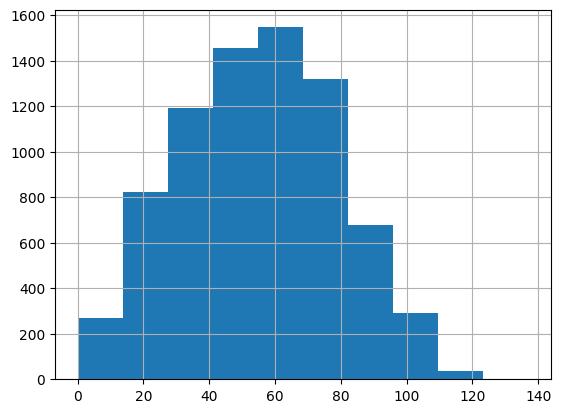

In [63]:
#number of characters present in each sentence
text['Processed_Text'].str.len().hist()

In [64]:
# number of words appearing in each processed text
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

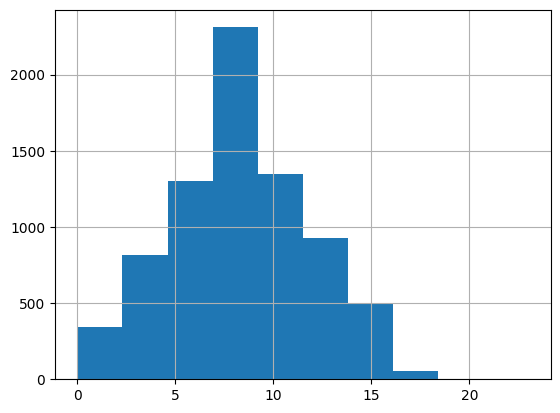

In [65]:
plot_word_number_histogram(text['Processed_Text'])

In [66]:
import numpy as np

In [67]:
# Analyzing the stop words removed from the original tweets
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

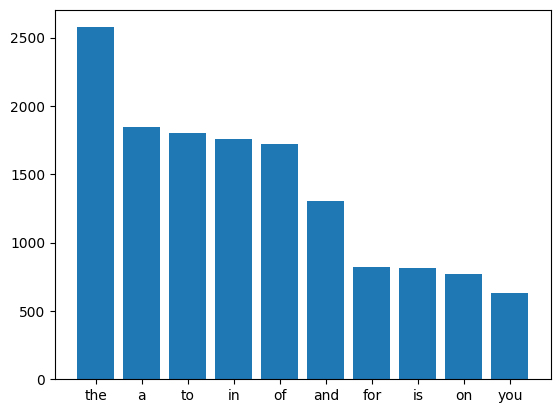

In [68]:
plot_top_stopwords_barchart(text['text'])

In [69]:
#Top non stop words
import seaborn as sns
from collections import  Counter


In [70]:
# Analyzing top non-stopwords from the processed text
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        #if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

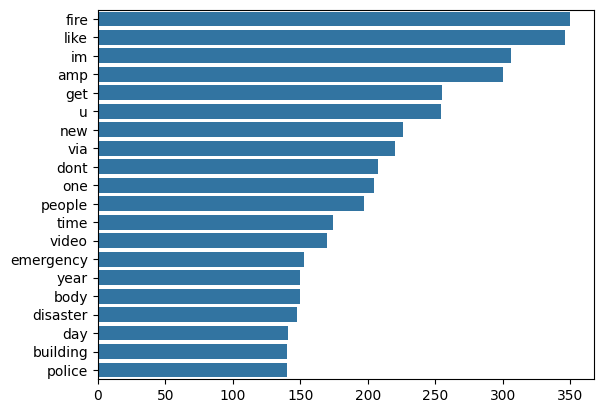

In [71]:
plot_top_non_stopwords_barchart(text['Processed_Text'])

In [72]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
# Analyzing to ngrams
def plot_top_ngrams_barchart(text, n=2): #n=2 defines ngrams we want to use
    #stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

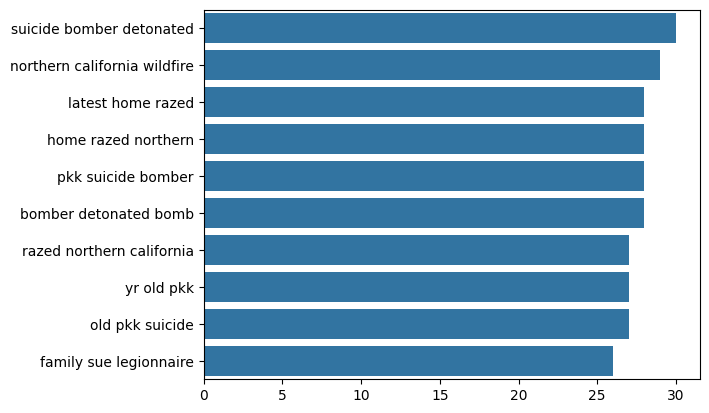

In [77]:
plot_top_ngrams_barchart(text['Processed_Text'],3)

## Word cloud

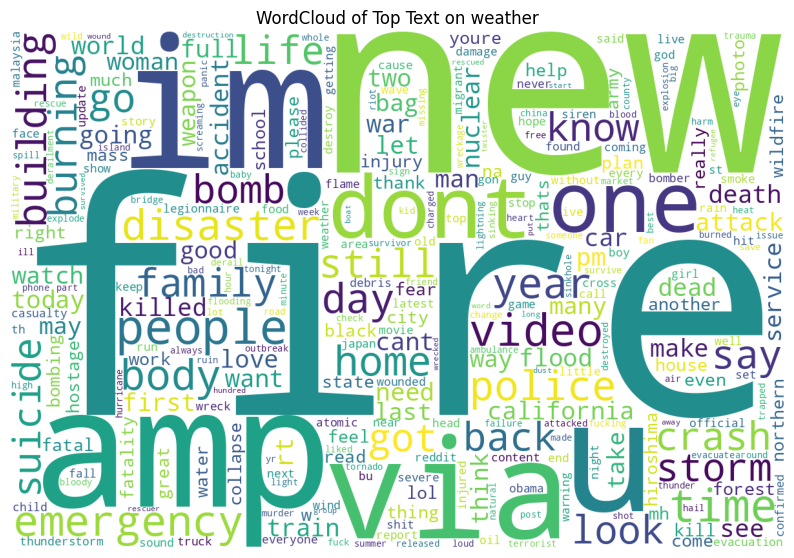

In [76]:
# plotting a word cloud
plt.figure(figsize=(10,8))
wordcloud = WordCloud(max_words=300, width=1200, height=800, background_color='white',
                        collocations=False).generate(" ".join(text['Processed_Text']))
plt.grid(None)
plt.title("WordCloud of Top Text on weather")
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('word_cloud.png')